In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
disaster = pd.read_csv('C:/Users/Dikshant Gupta/Desktop/VIT/SEM 6/CSE3020_DV_Prj_NIL/data/tweets.csv')
disaster.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [3]:
# Loading required features
disaster = disaster[['text','target']]
disaster.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


In [4]:
# Checking the Null Values
disaster.isna().sum()

text      0
target    0
dtype: int64

In [5]:
# Checking the DF size
disaster.shape

(11370, 2)

In [7]:
disaster['target'].value_counts()

0    9256
1    2114
Name: target, dtype: int64

In [8]:
disaster['text'] = [entry.lower() for entry in disaster['text']]
disaster['text'].head()

0    communal violence in bhainsa, telangana. "ston...
1    telangana: section 144 has been imposed in bha...
2    arsonist sets cars ablaze at dealership https:...
3    arsonist sets cars ablaze at dealership https:...
4    "lord jesus, your love brings freedom and pard...
Name: text, dtype: object

In [9]:
# Loading packages for Tokenzation
import nltk
from nltk.tokenize import word_tokenize

In [12]:
disaster['text'] = [word_tokenize(entry) for entry in disaster['text']]

In [13]:
disaster['text'].head()

0    [communal, violence, in, bhainsa, ,, telangana...
1    [telangana, :, section, 144, has, been, impose...
2    [arsonist, sets, cars, ablaze, at, dealership,...
3    [arsonist, sets, cars, ablaze, at, dealership,...
4    [``, lord, jesus, ,, your, love, brings, freed...
Name: text, dtype: object

In [14]:
# POS & Stemming
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet

In [19]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['j'] = wn.ADJ
tag_map['v'] = wn.VERB
tag_map['v'] = wn.ADV

In [22]:
# Storing all the stopwords into variables
stop_words = set(stopwords.words("english"))
print(stop_words)

{'having', "haven't", 'was', 'yourselves', 'the', 'further', "didn't", 'this', 'until', 'weren', 'did', 'most', 'here', 'nor', 'just', 'we', "mustn't", 'shan', 'd', 'itself', 'than', 's', 'mustn', 'wasn', 'ourselves', 'didn', 'yourself', 'should', 'hers', 'ain', 'its', 'couldn', 'they', 'wouldn', 'do', 'isn', "needn't", 'are', 'those', 'she', 'does', 'above', 'by', 'their', 'ma', 'them', 'only', "weren't", 'on', 'her', "wasn't", 'your', 'once', "mightn't", 'from', 'why', 'don', "aren't", "she's", 'you', 'themselves', "should've", 'off', "that'll", "shouldn't", 'ours', "you'd", 'how', 'each', "you've", 'not', 'very', 'be', 'he', 'theirs', 'shouldn', 'doesn', 'y', 'i', 'll', 'as', 'that', 'below', 'in', 'so', 'yours', 'about', "you'll", 'other', "doesn't", 'which', 'myself', 'own', "don't", 'no', 'again', 're', 'or', 'o', 'am', 'has', 'during', "couldn't", 'is', 'were', "isn't", 've', 'where', 'with', 'at', 'against', 'then', 'an', "hadn't", 'these', 'm', 'when', 'while', 'now', 'before'

In [25]:
for index,entry in enumerate(disaster['text']):
    Final_words = []
    word_lemmstized = WordNetLemmatizer()
    for word,tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_final = word_lemmstized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_final)
    disaster.loc[index,'text_final'] = str(Final_words)

In [26]:
disaster.head()

,text,target,text_final
0,"[communal, violence, in, bhainsa, ,, telangana...",1,"['communal', 'violence', 'bhainsa', 'telangana..."
1,"[telangana, :, section, 144, has, been, impose...",1,"['telangana', 'section', 'imposed', 'bhainsa',..."
2,"[arsonist, sets, cars, ablaze, at, dealership,...",1,"['arsonist', 'set', 'car', 'ablaze', 'dealersh..."
3,"[arsonist, sets, cars, ablaze, at, dealership,...",1,"['arsonist', 'set', 'car', 'ablaze', 'dealersh..."
4,"[``, lord, jesus, ,, your, love, brings, freed...",0,"['lord', 'jesus', 'love', 'brings', 'freedom',..."


In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [29]:
# splitting all the words from the data and assining those to Comment-words
comment_words = ' '
stopwords = set(STOPWORDS)

In [30]:
for val in disaster.text_final:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '

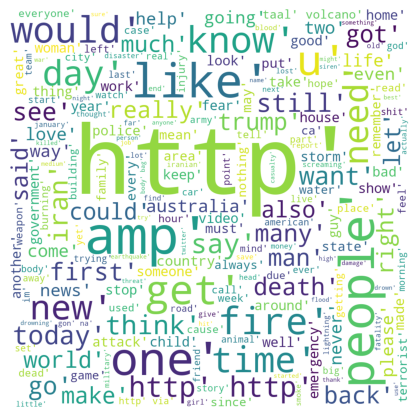

In [31]:
wordcloud = WordCloud(width = 1000, height =1000, background_color = 'white',
                      stopwords = stopwords,min_font_size = 10).generate(comment_words)


plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Naive Bayes Model Building & Testing

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection,naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [33]:
Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(disaster['text_final'],disaster['target'],test_size = 0.3)
encoder = LabelEncoder()
Train_Y = encoder.fit_transform(Train_Y)
Test_Y = encoder.fit_transform(Test_Y)

In [34]:
y = Train_Y.tolist()

In [35]:
Tfidf_vect = TfidfVectorizer(max_features = 5000)
Tfidf_vect.fit(disaster['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [36]:
data = Train_X_Tfidf.toarray()
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
naive = naive_bayes.MultinomialNB()
naive.fit(Train_X_Tfidf,Train_Y)

MultinomialNB()

In [38]:
predictions_NB = naive.predict(Test_X_Tfidf)

In [39]:
print("Model Accuracy : ",accuracy_score(predictions_NB,Test_Y)*100)

Model Accuracy :  87.65757842274992
